In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [447]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Выборки_cian/Офисы_Ектб.xlsx', sheet_name = 2)
df

,Назначение_1,Назначение_2,Отдельный вход,Площадь,Этаж_1,Этаж_2,Этажность,Год постройки,ХВ,Цена,...,Широта,Долгота,Комментарий,Тип здания,Состояние отделки,Текст_об,Адрес,Категория здания,Общая площадь,Статус участка
0,Свободное назначение,Свободное назначение,есть,307.3,1,первый,4,1939,85,51662400,...,56.833654,60.614264,1 и подвал,Жилой дом,с отделкой,"Продается помещение свободного назначения, общ...","Свердловская область, Екатеринбург, р-н Центр,...",Действующее,"2 705,5 м²",В собственности
1,Офис (А),Офис,нет,1131.2,2,второй,4,2009,15,87824400,...,56.833245,60.608218,"1, подвал, 2",Бизнес-центр,с отделкой,"Продаются помещения свободного назначения, рас...","Свердловская область, Екатеринбург, р-н Центр,...",Действующее,16 000 м²,В собственности
2,Офис,Офис,нет,137.6,2,второй,20,2016,8,13800000,...,56.829320,60.611901,NaN,Жилой дом,с отделкой,Продаем помещение свободного назначения в жило...,"Свердловская область, Екатеринбург, р-н Центр,...",Действующее,"137,6 м²",В собственности
3,Офис,Офис,нет,20.7,3,с 3 по 10,3,1994,30,1400000,...,56.844456,60.644097,NaN,Административное здание,с отделкой,"Офис на 3 этаже здания по ул. Гагарина, 14. Ес...","Свердловская область, Екатеринбург, р-н Кировс...",Действующее,"20,7 м²",В собственности
4,Свободное назначение,Офис,нет,54.6,3,с 3 по 10,3,1994,30,3167000,...,56.844456,60.644097,NaN,Административное здание,с отделкой,Продаем секцию из двух помещений на 3 этаже зд...,"Свердловская область, Екатеринбург, р-н Кировс...",NaN,"54,6 м²",В собственности
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Офис,Офис,нет,1520.0,6,с 3 по 10,13,2019,5,114000000,...,56.885830,60.635105,NaN,Бизнес-центр,с отделкой,Продажа коммерческого помещения.\nЛокация : г....,"Свердловская область, Екатеринбург, р-н Орджон...",NaN,1 520 м²,NaN
247,Офис,Офис,нет,110.0,4,с 3 по 10,13,2019,5,8800000,...,56.885830,60.635105,NaN,Бизнес-центр,с отделкой,Продажа коммерческого помещения.\nЛокация : г....,"Свердловская область, Екатеринбург, р-н Орджон...",NaN,110 м²,NaN
248,Офис,Офис,нет,48.0,5,с 3 по 10,13,2019,5,4224000,...,56.885830,60.635105,NaN,Бизнес-центр,с отделкой,"офис с чистовой отделкой , есть места в подзем...","Свердловская область, Екатеринбург, р-н Орджон...",NaN,48 м²,NaN
249,Офис (B+),Офис,нет,193.8,2,второй,7,2006,18,16279201,...,56.840646,60.612180,NaN,Бизнес-центр,с отделкой,"Продается офисное помещение в БЦ ""Консул"". Рас...","Свердловская область, Екатеринбург, р-н Центр,...",Действующее,"193,8 м²",В собственности


In [448]:
df = df.drop(['Комментарий', 'Общая площадь', 'Статус участка', 'Адрес', 'Текст_об'], axis=1)
df

,Назначение_1,Назначение_2,Отдельный вход,Площадь,Этаж_1,Этаж_2,Этажность,Год постройки,ХВ,Цена,Цена (кв.м),Широта,Долгота,Тип здания,Состояние отделки,Категория здания
0,Свободное назначение,Свободное назначение,есть,307.3,1,первый,4,1939,85,51662400,168117.149365,56.833654,60.614264,Жилой дом,с отделкой,Действующее
1,Офис (А),Офис,нет,1131.2,2,второй,4,2009,15,87824400,77638.260255,56.833245,60.608218,Бизнес-центр,с отделкой,Действующее
2,Офис,Офис,нет,137.6,2,второй,20,2016,8,13800000,100290.697674,56.829320,60.611901,Жилой дом,с отделкой,Действующее
3,Офис,Офис,нет,20.7,3,с 3 по 10,3,1994,30,1400000,67632.850242,56.844456,60.644097,Административное здание,с отделкой,Действующее
4,Свободное назначение,Офис,нет,54.6,3,с 3 по 10,3,1994,30,3167000,58003.663004,56.844456,60.644097,Административное здание,с отделкой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Офис,Офис,нет,1520.0,6,с 3 по 10,13,2019,5,114000000,75000.000000,56.885830,60.635105,Бизнес-центр,с отделкой,NaN
247,Офис,Офис,нет,110.0,4,с 3 по 10,13,2019,5,8800000,80000.000000,56.885830,60.635105,Бизнес-центр,с отделкой,NaN
248,Офис,Офис,нет,48.0,5,с 3 по 10,13,2019,5,4224000,88000.000000,56.885830,60.635105,Бизнес-центр,с отделкой,NaN
249,Офис (B+),Офис,нет,193.8,2,второй,7,2006,18,16279201,84000.005160,56.840646,60.612180,Бизнес-центр,с отделкой,Действующее


In [449]:
from geopy.distance import geodesic as GD 

l = []
centre = (56.836254, 60.597492) 

for j in range(0, 251, 1):
    dote = (df['Широта'][j], df['Долгота'][j])
    dis = GD(centre, dote).km * 1000
    l.append(dis)
l

[1063.9313295115512,
 735.4888366687162,
 1170.4238515842926,
 2987.4478780654777,
 2987.4478780654777,
 1047.4362450926576,
 7016.4118191137195,
 9897.915464932974,
 5448.187892840249,
 5448.187892840249,
 2753.9962099546824,
 769.7041170193863,
 7490.6391201341075,
 1140.3416574696435,
 3150.4207317786613,
 6176.8462595844085,
 3309.455765095424,
 5976.105757062026,
 3150.4207317786613,
 769.7041170193863,
 1556.110371529937,
 351.60547030323664,
 565.855012778839,
 2350.4374448365666,
 6918.706896935381,
 9897.915464932974,
 565.855012778839,
 2505.849217711737,
 3150.4207317786613,
 1087.1418522096526,
 3397.9592419166747,
 2592.6416500628816,
 3150.4207317786613,
 1297.8539282196484,
 252.28344747422227,
 1583.0557559538663,
 1093.0370045601044,
 546.8187010695723,
 1977.0003483796927,
 2985.202390093877,
 2606.3492657622423,
 1502.0790306190388,
 3351.9652780528368,
 4168.800791697714,
 1169.918991435026,
 1502.0790306190388,
 769.7041170193863,
 3553.3955525698298,
 6662.5826132

In [450]:
df['Расстояние'] = l
df

,Назначение_1,Назначение_2,Отдельный вход,Площадь,Этаж_1,Этаж_2,Этажность,Год постройки,ХВ,Цена,Цена (кв.м),Широта,Долгота,Тип здания,Состояние отделки,Категория здания,Расстояние
0,Свободное назначение,Свободное назначение,есть,307.3,1,первый,4,1939,85,51662400,168117.149365,56.833654,60.614264,Жилой дом,с отделкой,Действующее,1063.931330
1,Офис (А),Офис,нет,1131.2,2,второй,4,2009,15,87824400,77638.260255,56.833245,60.608218,Бизнес-центр,с отделкой,Действующее,735.488837
2,Офис,Офис,нет,137.6,2,второй,20,2016,8,13800000,100290.697674,56.829320,60.611901,Жилой дом,с отделкой,Действующее,1170.423852
3,Офис,Офис,нет,20.7,3,с 3 по 10,3,1994,30,1400000,67632.850242,56.844456,60.644097,Административное здание,с отделкой,Действующее,2987.447878
4,Свободное назначение,Офис,нет,54.6,3,с 3 по 10,3,1994,30,3167000,58003.663004,56.844456,60.644097,Административное здание,с отделкой,NaN,2987.447878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Офис,Офис,нет,1520.0,6,с 3 по 10,13,2019,5,114000000,75000.000000,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558
247,Офис,Офис,нет,110.0,4,с 3 по 10,13,2019,5,8800000,80000.000000,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558
248,Офис,Офис,нет,48.0,5,с 3 по 10,13,2019,5,4224000,88000.000000,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558
249,Офис (B+),Офис,нет,193.8,2,второй,7,2006,18,16279201,84000.005160,56.840646,60.612180,Бизнес-центр,с отделкой,Действующее,1021.218095


# PCA и TSNE метод 1

In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_pca_k = df[['Площадь', 'Этаж_1', 'ХВ', 'Широта', 'Долгота', 'Расстояние']]

mms = StandardScaler() #если переменные сильно отличаются по масштабу, то лучше делать стандартизацию
mms.fit(df_pca_k)

df_pca_k_std = pd.DataFrame(mms.transform(df_pca_k), columns = df_pca_k.columns)

pca = PCA(n_components = 1)
df_pca = pca.fit_transform(df_pca_k_std)

print(pca.explained_variance_ratio_)

[0.23864275]


In [69]:
df_pca_k_std

,Площадь,Этаж_1,ХВ,Широта,Долгота,Расстояние
0,0.441427,-0.631499,2.775224,-0.174514,0.160145,-1.077063
1,3.600946,-0.346416,-0.419265,-0.188907,-0.045598,-1.245280
2,-0.209344,-0.346416,-0.738714,-0.327034,0.079733,-1.022521
3,-0.657636,-0.061333,0.265268,0.205627,1.175350,-0.091903
4,-0.527635,-0.061333,0.265268,0.205627,1.175350,-0.091903
...,...,...,...,...,...,...
246,5.091929,0.793916,-0.875621,1.661647,0.869356,1.439976
247,-0.315185,0.223750,-0.875621,1.661647,0.869356,1.439976
248,-0.552945,0.508833,-0.875621,1.661647,0.869356,1.439976
249,0.006174,-0.346416,-0.282359,0.071546,0.089227,-1.098939


In [57]:
df_pca

array([[-0.3702515 ],
       [ 2.05920941],
       [ 0.59156255],
       [-0.71213825],
       [-0.66435398],
       [ 3.18805377],
       [-2.37183487],
       [-2.53269641],
       [-0.46549019],
       [-0.45393175],
       [ 0.49538998],
       [ 2.67871027],
       [-3.09373926],
       [ 0.78702088],
       [-0.35741963],
       [-1.74885471],
       [ 0.18204676],
       [-1.26736903],
       [-0.34336626],
       [ 1.21496631],
       [ 1.60933935],
       [ 1.51858624],
       [ 2.69133712],
       [ 0.35305236],
       [-0.81343826],
       [-2.5226885 ],
       [ 2.70416417],
       [-0.3246943 ],
       [-0.3591111 ],
       [ 1.49537248],
       [-0.07103045],
       [ 0.4192673 ],
       [-0.35664436],
       [ 0.45218964],
       [-0.07652453],
       [-0.00569747],
       [ 2.21525817],
       [-0.59218936],
       [ 0.43922971],
       [ 0.30812982],
       [ 1.80333481],
       [ 0.1849553 ],
       [-0.78720922],
       [-1.32344138],
       [ 0.13086146],
       [ 1

In [58]:
df.insert(10, "pca_f", df_pca)
df

,Назначение_1,Назначение_2,Отдельный вход,Площадь,Этаж_1,Этаж_2,Этажность,Год постройки,ХВ,Цена,pca_f,Цена (кв.м),Широта,Долгота,Тип здания,Состояние отделки,Категория здания,Расстояние
0,Свободное назначение,Свободное назначение,есть,307.3,1,первый,4,1939,85,51662400,-0.370252,168117.149365,56.833654,60.614264,Жилой дом,с отделкой,Действующее,1063.931330
1,Офис (А),Офис,нет,1131.2,2,второй,4,2009,15,87824400,2.059209,77638.260255,56.833245,60.608218,Бизнес-центр,с отделкой,Действующее,735.488837
2,Офис,Офис,нет,137.6,2,второй,20,2016,8,13800000,0.591563,100290.697674,56.829320,60.611901,Жилой дом,с отделкой,Действующее,1170.423852
3,Офис,Офис,нет,20.7,3,с 3 по 10,3,1994,30,1400000,-0.712138,67632.850242,56.844456,60.644097,Административное здание,с отделкой,Действующее,2987.447878
4,Свободное назначение,Офис,нет,54.6,3,с 3 по 10,3,1994,30,3167000,-0.664354,58003.663004,56.844456,60.644097,Административное здание,с отделкой,NaN,2987.447878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Офис,Офис,нет,1520.0,6,с 3 по 10,13,2019,5,114000000,1.192954,75000.000000,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558
247,Офис,Офис,нет,110.0,4,с 3 по 10,13,2019,5,8800000,-1.097318,80000.000000,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558
248,Офис,Офис,нет,48.0,5,с 3 по 10,13,2019,5,4224000,-1.033319,88000.000000,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558
249,Офис (B+),Офис,нет,193.8,2,второй,7,2006,18,16279201,0.533233,84000.005160,56.840646,60.612180,Бизнес-центр,с отделкой,Действующее,1021.218095


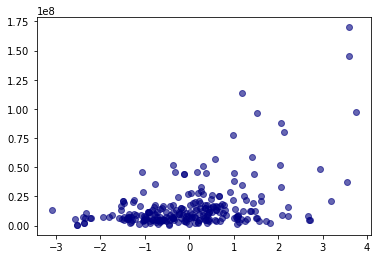

In [59]:
plt.scatter(x=df['pca_f'], y=df['Цена'], c='navy', alpha=0.6)
plt.show()

In [65]:
df_i = df.loc[df['Цена'] < 40000000]
len(df_i)

229

In [66]:
df_i = df_i.loc[(df_i['pca_f'] > -2) & (df_i['pca_f'] < 2)] #не делал
len(df_i)

209

In [67]:
from sklearn.model_selection import train_test_split

X = df_i[['Площадь', 'Этаж_1', 'ХВ', 'Широта', 'Долгота', 'Расстояние']] #'Площадь' LN(Площадь) 
#X = df_i[['Площадь', 'Этаж_1', 'ХВ', 'pca_kor', 'Расстояние']] #'Площадь' LN(Площадь)
#cat_features = [3]
#Y = df_2['LN(Цена)']
Y = df_i['Цена']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [68]:
from catboost import Pool, cv

cv_data = X

labels = Y

#cat_features = [4]

cv_dataset = Pool(data = cv_data,
                  label = labels,
                  #cat_features = cat_features
                  )

params = {"iterations": 1100,
          "max_depth": 6,
          "learning_rate": 0.013,
          #"l2_leaf_reg": 0.20,
          "random_seed": 5,
          "loss_function": "MAE",
          "custom_loss": "MAPE",    #['AUC', 'Accuracy'],
          "verbose": False,
          "od_type": 'Iter', #если модель переобучилась
          "od_wait":  20,
          "verbose": 100
         }

scores = cv(cv_dataset,
            params,
            fold_count = 5,
            shuffle = True,
            partition_random_seed = 0,
            verbose = False,
            plot = "True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 2322607.514
bestIteration = 231

Training on fold [1/5]

bestTest = 2397361.964
bestIteration = 660

Training on fold [2/5]

bestTest = 2693106.455
bestIteration = 464

Training on fold [3/5]

bestTest = 3122404.998
bestIteration = 830

Training on fold [4/5]

bestTest = 2991526.88
bestIteration = 407



In [71]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 1, learning_rate = 'auto', init = 'random', perplexity = 3).fit_transform(df_pca_k_std)
tsne.shape

(251, 1)

In [72]:
df.insert(10, "tsne_f", tsne)
df

,Назначение_1,Назначение_2,Отдельный вход,Площадь,Этаж_1,Этаж_2,Этажность,Год постройки,ХВ,Цена,tsne_f,pca_f,Цена (кв.м),Широта,Долгота,Тип здания,Состояние отделки,Категория здания,Расстояние
0,Свободное назначение,Свободное назначение,есть,307.3,1,первый,4,1939,85,51662400,-82.111725,-0.370252,168117.149365,56.833654,60.614264,Жилой дом,с отделкой,Действующее,1063.931330
1,Офис (А),Офис,нет,1131.2,2,второй,4,2009,15,87824400,38.644112,2.059209,77638.260255,56.833245,60.608218,Бизнес-центр,с отделкой,Действующее,735.488837
2,Офис,Офис,нет,137.6,2,второй,20,2016,8,13800000,4.154979,0.591563,100290.697674,56.829320,60.611901,Жилой дом,с отделкой,Действующее,1170.423852
3,Офис,Офис,нет,20.7,3,с 3 по 10,3,1994,30,1400000,89.818825,-0.712138,67632.850242,56.844456,60.644097,Административное здание,с отделкой,Действующее,2987.447878
4,Свободное назначение,Офис,нет,54.6,3,с 3 по 10,3,1994,30,3167000,89.770622,-0.664354,58003.663004,56.844456,60.644097,Административное здание,с отделкой,NaN,2987.447878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Офис,Офис,нет,1520.0,6,с 3 по 10,13,2019,5,114000000,40.420967,1.192954,75000.000000,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558
247,Офис,Офис,нет,110.0,4,с 3 по 10,13,2019,5,8800000,47.235622,-1.097318,80000.000000,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558
248,Офис,Офис,нет,48.0,5,с 3 по 10,13,2019,5,4224000,45.663544,-1.033319,88000.000000,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558
249,Офис (B+),Офис,нет,193.8,2,второй,7,2006,18,16279201,1.414355,0.533233,84000.005160,56.840646,60.612180,Бизнес-центр,с отделкой,Действующее,1021.218095


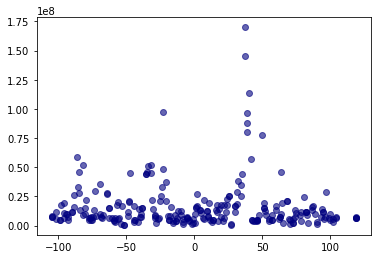

In [73]:
plt.scatter(x=df['tsne_f'], y=df['Цена'], c='navy', alpha=0.6)
plt.show()

In [74]:
df_i = df.loc[df['Цена'] < 40000000]
len(df_i)

229

# PCA для выбросов (pyod)

In [100]:
from pyod.models.pca import PCA

clf = PCA(contamination = 0.10, 
          copy = True, 
          iterated_power = 'auto', 
          n_components = None,
          n_selected_components = None, 
          standardization = True, 
          svd_solver = 'auto', 
          tol = 0.0, 
          weighted = True,
          whiten = False)

In [101]:
df_pca_k = df[['Площадь', 'Этаж_1', 'ХВ', 'Широта', 'Долгота', 'Расстояние']]

In [102]:
clf.fit(df_pca_k)
scores_pred = clf.decision_function(df_pca_k)
y_pred = clf.predict(df_pca_k)
#n_errors = (y_pred != ground_truth).sum()

In [103]:
scores_pred

array([122.98578232, 144.48047436,  71.67783876,  75.47505593,
        72.89102341, 197.00907781, 139.49001686, 189.37434402,
       106.99295301, 106.54314054,  75.96165288, 142.10610602,
       161.00880223,  82.89738116,  86.83688838, 129.18432915,
        73.92890379, 118.15237942,  86.20899489,  77.88901568,
        95.56650004,  88.48420027, 151.37787289,  67.52825103,
       142.44610678, 189.15467243, 151.06126707,  80.23416564,
        86.91384438,  98.67259158,  73.4512996 ,  83.79162646,
        86.80171543,  67.04152466, 109.30870212,  68.70540275,
       122.78278551, 164.49100486,  63.81313822,  63.8964513 ,
       113.42659875,  72.11520851,  74.33137548,  97.94363377,
        77.82939077,  91.65873898,  96.64607238,  78.55782135,
       119.64126909,  79.23361218,  78.17434101,  79.86293084,
        63.27641357,  83.20579643, 135.02627298, 122.49399797,
        90.91791438,  84.73877472,  79.68789271, 124.04237801,
        88.69336064, 117.37383299,  70.22141513, 136.96

In [104]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0])

In [105]:
df['выбросы_метки'] = y_pred
df['scores'] = scores_pred
df

,Назначение_1,Назначение_2,Отдельный вход,Площадь,Этаж_1,Этаж_2,Этажность,Год постройки,ХВ,Цена,...,pca_f,Цена (кв.м),Широта,Долгота,Тип здания,Состояние отделки,Категория здания,Расстояние,выбросы_метки,scores
0,Свободное назначение,Свободное назначение,есть,307.3,1,первый,4,1939,85,51662400,...,-0.370252,168117.149365,56.833654,60.614264,Жилой дом,с отделкой,Действующее,1063.931330,0,122.985782
1,Офис (А),Офис,нет,1131.2,2,второй,4,2009,15,87824400,...,2.059209,77638.260255,56.833245,60.608218,Бизнес-центр,с отделкой,Действующее,735.488837,1,144.480474
2,Офис,Офис,нет,137.6,2,второй,20,2016,8,13800000,...,0.591563,100290.697674,56.829320,60.611901,Жилой дом,с отделкой,Действующее,1170.423852,0,71.677839
3,Офис,Офис,нет,20.7,3,с 3 по 10,3,1994,30,1400000,...,-0.712138,67632.850242,56.844456,60.644097,Административное здание,с отделкой,Действующее,2987.447878,0,75.475056
4,Свободное назначение,Офис,нет,54.6,3,с 3 по 10,3,1994,30,3167000,...,-0.664354,58003.663004,56.844456,60.644097,Административное здание,с отделкой,NaN,2987.447878,0,72.891023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Офис,Офис,нет,1520.0,6,с 3 по 10,13,2019,5,114000000,...,1.192954,75000.000000,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558,1,215.670740
247,Офис,Офис,нет,110.0,4,с 3 по 10,13,2019,5,8800000,...,-1.097318,80000.000000,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558,0,109.769011
248,Офис,Офис,нет,48.0,5,с 3 по 10,13,2019,5,4224000,...,-1.033319,88000.000000,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558,0,113.554721
249,Офис (B+),Офис,нет,193.8,2,второй,7,2006,18,16279201,...,0.533233,84000.005160,56.840646,60.612180,Бизнес-центр,с отделкой,Действующее,1021.218095,0,64.855990


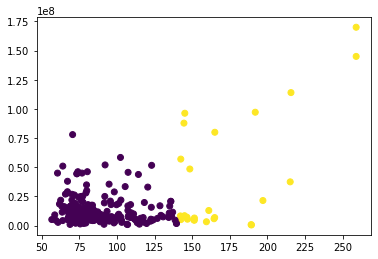

In [106]:
plt.scatter(x = df['scores'], y = df['Цена'], c = df['выбросы_метки'], alpha=1)
plt.show()

In [109]:
df_i = df.copy()

In [110]:
df_i = df_i.loc[df_i['выбросы_метки'] == 0]
len(df_i)

226

In [114]:
df_i = df_i.loc[df_i['Цена'] < 40000000]
len(df_i)

213

In [115]:
X = df_i[['Площадь', 'Этаж_1', 'ХВ', 'Широта', 'Долгота', 'Расстояние']] #'Площадь' LN(Площадь) 
#X = df_i[['Площадь', 'Этаж_1', 'ХВ', 'pca_kor', 'Расстояние']] #'Площадь' LN(Площадь)
#cat_features = [3]
#Y = df_2['LN(Цена)']
Y = df_i['Цена']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [116]:
from catboost import Pool, cv

cv_data = X

labels = Y

#cat_features = [4]

cv_dataset = Pool(data = cv_data,
                  label = labels,
                  #cat_features = cat_features
                  )

params = {"iterations": 1100,
          "max_depth": 3,
          "learning_rate": 0.013,
          #"l2_leaf_reg": 0.20,
          "random_seed": 5,
          "loss_function": "MAE",
          "custom_loss": "MAPE",    #['AUC', 'Accuracy'],
          "verbose": False,
          "od_type": 'Iter', #если модель переобучилась
          "od_wait":  20,
          "verbose": 100
         }

scores = cv(cv_dataset,
            params,
            fold_count = 5,
            shuffle = True,
            partition_random_seed = 0,
            verbose = False,
            plot = "True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 3123451.799
bestIteration = 315

Training on fold [1/5]

bestTest = 3415027.022
bestIteration = 827

Training on fold [2/5]

bestTest = 2280268.147
bestIteration = 417

Training on fold [3/5]

bestTest = 2518126.688
bestIteration = 1099

Training on fold [4/5]

bestTest = 3087151.227
bestIteration = 555



# KNN для выбросов (pyod)

In [122]:
from pyod.models.knn import KNN

X = df[['Цена', 'scores']]

clf_name = 'KNN'
clf = KNN(contamination = 0.2, n_neighbors = 5) #contamination - доля аномалий
clf.fit(X)

KNN(algorithm='auto', contamination=0.2, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [123]:
Y_train_pred = clf.labels_
Y_train_scores = clf.decision_scores_

In [124]:
df['выбросы_метки_2'] = Y_train_pred
df['scores_1'] = Y_train_scores
df

,Назначение_1,Назначение_2,Отдельный вход,Площадь,Этаж_1,Этаж_2,Этажность,Год постройки,ХВ,Цена,...,Широта,Долгота,Тип здания,Состояние отделки,Категория здания,Расстояние,выбросы_метки,scores,выбросы_метки_2,scores_1
0,Свободное назначение,Свободное назначение,есть,307.3,1,первый,4,1939,85,51662400,...,56.833654,60.614264,Жилой дом,с отделкой,Действующее,1063.931330,0,122.985782,1,5.462400e+06
1,Офис (А),Офис,нет,1131.2,2,второй,4,2009,15,87824400,...,56.833245,60.608218,Бизнес-центр,с отделкой,Действующее,735.488837,1,144.480474,1,2.617560e+07
2,Офис,Офис,нет,137.6,2,второй,20,2016,8,13800000,...,56.829320,60.611901,Жилой дом,с отделкой,Действующее,1170.423852,0,71.677839,0,3.000000e+05
3,Офис,Офис,нет,20.7,3,с 3 по 10,3,1994,30,1400000,...,56.844456,60.644097,Административное здание,с отделкой,Действующее,2987.447878,0,75.475056,0,4.000000e+05
4,Свободное назначение,Офис,нет,54.6,3,с 3 по 10,3,1994,30,3167000,...,56.844456,60.644097,Административное здание,с отделкой,NaN,2987.447878,0,72.891023,0,3.670000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Офис,Офис,нет,1520.0,6,с 3 по 10,13,2019,5,114000000,...,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558,1,215.670740,1,3.400000e+07
247,Офис,Офис,нет,110.0,4,с 3 по 10,13,2019,5,8800000,...,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558,0,109.769011,0,1.320000e+05
248,Офис,Офис,нет,48.0,5,с 3 по 10,13,2019,5,4224000,...,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558,0,113.554721,0,1.660000e+05
249,Офис (B+),Офис,нет,193.8,2,второй,7,2006,18,16279201,...,56.840646,60.612180,Бизнес-центр,с отделкой,Действующее,1021.218095,0,64.855990,0,4.207990e+05


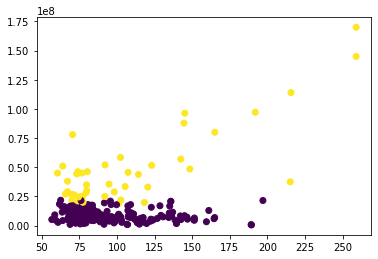

In [125]:
plt.scatter(x = df['scores'], y = df['Цена'], c = df['выбросы_метки_2'], alpha=1)
plt.show()

In [126]:
df_i = df.copy()

In [127]:
df_i = df_i.loc[df_i['выбросы_метки_2'] == 0]
len(df_i)

202

In [128]:
df_i = df_i.loc[df_i['scores'] < 150]
len(df_i)

192

In [139]:
X = df_i[['Площадь', 'Этаж_1', 'ХВ', 'Широта', 'Долгота', 'Расстояние']] #'Площадь' LN(Площадь) 
#X = df_i[['Площадь', 'Этаж_1', 'ХВ', 'pca_kor', 'Расстояние']] #'Площадь' LN(Площадь)
#cat_features = [3]
#Y = df_2['LN(Цена)']
Y = df_i['Цена']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [140]:
from catboost import Pool, cv

cv_data = X

labels = Y

#cat_features = [4]

cv_dataset = Pool(data = cv_data,
                  label = labels,
                  #cat_features = cat_features
                  )

params = {"iterations": 1100,
          "max_depth": 3,
          "learning_rate": 0.013,
          #"l2_leaf_reg": 0.20,
          "random_seed": 5,
          "loss_function": "RMSE",
          "custom_loss": "MAPE",    #['AUC', 'Accuracy'],
          "verbose": False,
          "od_type": 'Iter', #если модель переобучилась
          "od_wait":  20,
          "verbose": 100
         }

scores = cv(cv_dataset,
            params,
            fold_count = 5,
            shuffle = True,
            partition_random_seed = 0,
            verbose = False,
            plot = "True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 2468028.859
bestIteration = 702

Training on fold [1/5]

bestTest = 3040329.855
bestIteration = 664

Training on fold [2/5]

bestTest = 3247411.567
bestIteration = 296

Training on fold [3/5]

bestTest = 3377789.381
bestIteration = 746

Training on fold [4/5]

bestTest = 2350599.316
bestIteration = 859



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 1251291.189
MAPE на обучении: 0.1756
R2 на обучении: 0.8773
MAE на тесте: 2321219.8074
MAPE на тесте: 0.3727
R2 на обучении: 0.6402
MAE: 1468620.4396
MAPE: 0.2156
R2: 0.8142


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


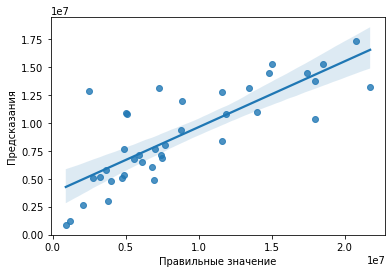

In [141]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
import seaborn as sns

catb = CatBoostRegressor(iterations = 1000, #максимальное количество построенных деревьев
                         random_seed = 5, 
                         learning_rate = 0.03, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 3, #глубина дерева
                         #l2_leaf_reg = 0.10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         #one_hot_max_size = 8, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 20) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = list(range(0, X.shape[1]))
#cat_features = list(df['transmission'])
#print(cat_features) 

catb.fit(X_train, Y_train, 
         #cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         plot = True) #включение графика

Ypred = catb.predict(X_test)

pred_1 = catb.predict(X)

pred_train = catb.predict(X_train)
mse_train = mse(Y_train, pred_train)

print("MAE на обучении:", round(mae(Y_train, pred_train), 4))
print("MAPE на обучении:", round(mape(Y_train, pred_train), 4))
print("R2 на обучении:", round(r2_score(Y_train, pred_train), 4))

pred_test = catb.predict(X_test)
mse_test = mse(Y_test, pred_test)

print("MAE на тесте:", round(mae(Y_test, pred_test), 4))
print("MAPE на тесте:", round(mape(Y_test, pred_test), 4))
print("R2 на обучении:", round(r2_score(Y_test, pred_test), 4))
print("===============================")
print("MAE:", round(mae(Y, pred_1), 4))
print("MAPE:", round(mape(Y, pred_1), 4))
print("R2:", round(r2_score(Y, pred_1), 4))

sns.regplot(Y_test, pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [142]:
df_189 = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Выборки_cian/Офисы_Ектб.xlsx', sheet_name = 0)
df_189

,Назначение_1,Назначение_2,Отдельный вход,Площадь,LN(Площадь),Этаж_1,Этаж_2,Этажность,Год постройки,ХВ,...,LN(Цена),Цена (кв.м),Широта,Долгота,pca_kor,Комментарий,Тип здания,Состояние отделки,Расстояние,выбросы_метки
0,Офис,Офис,нет,137.6,4.924351,2,второй,20,2016,8,...,16.440179,100290.697674,56.829320,60.611901,0.003272,NaN,Жилой дом,с отделкой,1170.423852,0
1,Офис,Офис,нет,20.7,3.030134,3,с 3 по 10,3,1994,30,...,14.151983,67632.850242,56.844456,60.644097,-0.031873,NaN,Административное здание,с отделкой,2987.447878,0
2,Свободное назначение,Офис,нет,54.6,4.000034,3,с 3 по 10,3,1994,30,...,14.968295,58003.663004,56.844456,60.644097,-0.031873,NaN,Административное здание,с отделкой,2987.447878,0
3,Офис,Свободное назначение,есть,31.8,3.459466,1,первый,1,1964,60,...,14.457364,59748.427673,56.899257,60.598939,-0.025219,NaN,Торговое,с отделкой,7016.411819,0
4,Свободное назначение,Свободное назначение,есть,19.7,2.980619,0,цоколь/подвал,10,2000,24,...,13.289571,30000.000000,56.747956,60.616079,0.045443,NaN,Жилой дом,с отделкой,9897.915465,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Офис (А),Свободное назначение,есть,119.0,4.779123,1,первый,9,2007,17,...,16.292049,100000.000000,56.834092,60.653359,-0.033729,NaN,Жилой дом,с отделкой,3418.643280,0
184,Офис,Офис,нет,110.0,4.700480,4,с 3 по 10,13,2019,5,...,15.990262,80000.000000,56.885830,60.635105,-0.047632,NaN,Бизнес-центр,с отделкой,5978.427558,0
185,Офис,Офис,нет,48.0,3.871201,5,с 3 по 10,13,2019,5,...,15.256293,88000.000000,56.885830,60.635105,-0.047632,NaN,Бизнес-центр,с отделкой,5978.427558,0
186,Офис (B+),Офис,нет,193.8,5.266827,2,второй,7,2006,18,...,16.605399,84000.005160,56.840646,60.612180,-0.003311,NaN,Бизнес-центр,с отделкой,1021.218095,0


In [146]:
X = df_189[['Площадь', 'Этаж_1', 'ХВ', 'Широта', 'Долгота', 'Расстояние']] #'Площадь' LN(Площадь) 
#X = df_i[['Площадь', 'Этаж_1', 'ХВ', 'pca_kor', 'Расстояние']] #'Площадь' LN(Площадь)
#cat_features = [3]
#Y = df_2['LN(Цена)']
Y = df_189['Цена']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [144]:
from catboost import Pool, cv

cv_data = X

labels = Y

#cat_features = [4]

cv_dataset = Pool(data = cv_data,
                  label = labels,
                  #cat_features = cat_features
                  )

params = {"iterations": 1100,
          "max_depth": 3,
          "learning_rate": 0.013,
          #"l2_leaf_reg": 0.20,
          "random_seed": 5,
          "loss_function": "RMSE",
          "custom_loss": "MAPE",    #['AUC', 'Accuracy'],
          "verbose": False,
          "od_type": 'Iter', #если модель переобучилась
          "od_wait":  20,
          "verbose": 100
         }

scores = cv(cv_dataset,
            params,
            fold_count = 5,
            shuffle = True,
            partition_random_seed = 0,
            verbose = False,
            plot = "True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 2022726.703
bestIteration = 539

Training on fold [1/5]

bestTest = 2586351.223
bestIteration = 716

Training on fold [2/5]

bestTest = 2713889.659
bestIteration = 650

Training on fold [3/5]

bestTest = 3086515.569
bestIteration = 800

Training on fold [4/5]

bestTest = 2364463.745
bestIteration = 1008



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 1103240.0023
MAPE на обучении: 0.1621
R2 на обучении: 0.926
MAE на тесте: 1698224.0957
MAPE на тесте: 0.1396
R2 на обучении: 0.8386
MAE: 1223502.7446
MAPE: 0.1575
R2: 0.9069


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


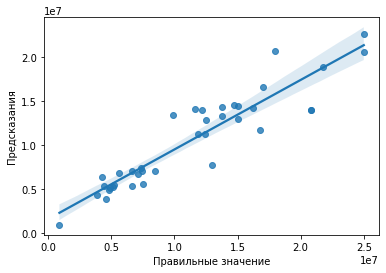

In [155]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
import seaborn as sns

catb = CatBoostRegressor(iterations = 1000, #максимальное количество построенных деревьев
                         random_seed = 5, 
                         learning_rate = 0.02, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 3, #глубина дерева
                         #l2_leaf_reg = 0.10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         #one_hot_max_size = 8, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 20) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = list(range(0, X.shape[1]))
#cat_features = list(df['transmission'])
#print(cat_features) 

catb.fit(X_train, Y_train, 
         #cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         plot = True) #включение графика

Ypred = catb.predict(X_test)

pred_1 = catb.predict(X)

pred_train = catb.predict(X_train)
mse_train = mse(Y_train, pred_train)

print("MAE на обучении:", round(mae(Y_train, pred_train), 4))
print("MAPE на обучении:", round(mape(Y_train, pred_train), 4))
print("R2 на обучении:", round(r2_score(Y_train, pred_train), 4))

pred_test = catb.predict(X_test)
mse_test = mse(Y_test, pred_test)

print("MAE на тесте:", round(mae(Y_test, pred_test), 4))
print("MAPE на тесте:", round(mape(Y_test, pred_test), 4))
print("R2 на обучении:", round(r2_score(Y_test, pred_test), 4))
print("===============================")
print("MAE:", round(mae(Y, pred_1), 4))
print("MAPE:", round(mape(Y, pred_1), 4))
print("R2:", round(r2_score(Y, pred_1), 4))

sns.regplot(Y_test, pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

# Критерий Шовене

In [213]:
#Критерий Шовене

import pandas as pd
import numpy as np
from scipy.special import erfc

#my_set = [8.02, 8.16, 3.97, 8.64, 0.84, 4.46, 0.81, 7.74, 8.78, 9.26, 20.46, 29.87, 10.38, 25.71]
my_set = np.array(df['Расстояние'])

df_my_set = pd.DataFrame(data=my_set).sort_values(0).rename(columns={0:'df_values'}).reset_index().loc[:,['df_values']]

delited_values = []
current_df = df_my_set # делаем копию датасета
iter = 1
while len(current_df)>2:
    current_df['standarted_values'] = erfc((current_df.df_values - current_df.df_values.mean())/current_df.df_values.std()) # добавляем колоку со значениями erfc
    criterion = 1/(2*current_df.df_values.count()) # считаем критерий
    detected_values = current_df.query('standarted_values < @criterion').reset_index().loc[:, 'df_values'].to_list() # отбираем выбросы
    current_df = current_df.query('standarted_values >= @criterion').reset_index().loc[:, ['df_values']] # переопределяем датасет, оставив только не выбросы
    if len(detected_values) == 0: # если выбросов больше нет - выходим из цикла
        break
    else:
        print(f'Iter:{iter}, Delited values: {detected_values}')
        delited_values.extend(detected_values)
        iter += 1

print('-'*40)
print(f'Clean data: {current_df.df_values.to_list()}')

Iter:1, Delited values: [7490.6391201341075, 7705.006848690795, 7917.722653061149, 7985.01553430976, 9897.915464932974, 9897.915464932974]
Iter:2, Delited values: [7016.4118191137195, 7016.4118191137195, 7262.650147813466, 7365.597787720077]
Iter:3, Delited values: [6722.387036992545, 6854.84938557873, 6918.706896935381]
Iter:4, Delited values: [6615.612474557096, 6662.582613208228]
Iter:5, Delited values: [6460.561080715441]
----------------------------------------
Clean data: [232.24329176064302, 232.24329176064302, 252.28344747422227, 351.60547030323664, 401.89215612525356, 522.3928888713273, 539.7401745658516, 546.8187010695723, 565.855012778839, 565.855012778839, 570.6599087973593, 612.3807690269596, 735.4888366687162, 769.7041170193863, 769.7041170193863, 769.7041170193863, 769.7041170193863, 769.7041170193863, 877.8820119168878, 936.2441814328514, 988.1722898090192, 1017.8059880680684, 1021.2180948473653, 1021.2180948473653, 1021.2180948473653, 1047.4362450926576, 1063.931329511

In [207]:
current_df

,df_values
0,591000
1,808000
2,895000
3,1000000
4,1130000
...,...
172,15000000
173,15000000
174,15000000
175,15330000


In [208]:
df_my_set

,df_values,standarted_values
0,591000,1.701429e+00
1,808000,1.694609e+00
2,895000,1.691845e+00
3,1000000,1.688488e+00
4,1130000,1.684299e+00
...,...,...
246,96305000,7.290238e-08
247,97172000,5.267047e-08
248,114000000,4.985134e-11
249,145000000,5.069772e-18


# IQR

In [238]:
#IQR
def find_outlers_quantile(data, k, only_outliers=False):
    data = np.array(data)
    q_25 = np.quantile(data, 0.25)
    q_75 = np.quantile(data, 0.75)
    x_min = q_25 - (q_75 - q_25) * k
    x_max = q_75 + (q_75 - q_25) * k
    out = data[(data <= x_min) | (data >= x_max)]
    ins = data[(data > x_min) & (data < x_max)]
    if only_outliers:
        return x_min, x_max, out
    return x_min, x_max, ins

In [243]:
q = find_outlers_quantile(df['Площадь'], k = 1.5, only_outliers = True)

In [250]:
q[2]

array([1131.2,  462. ,  600. ,  478. ,  881. , 1266.8,  827. ,  779. ,
        453.6, 1937.3,  640. ,  505. , 1143.2, 1133. ,  570.8,  453.6,
        760. , 1937.3, 1520. ])

# Расстояния

In [363]:
#Выбросом будет считаться объект, у которого суммарное расстояние от него до остальных объектов выборки наибольшее
from scipy.spatial import distance #Евклидово
from scipy.spatial.distance import cityblock #Манхэттенское

V = df[['Площадь', 'Этаж_1', 'Год постройки', 'Широта', 'Долгота', 'Расстояние']]

mms = StandardScaler() #если переменные сильно отличаются по масштабу, то лучше делать стандартизацию
mms.fit(V)

V_std = pd.DataFrame(mms.transform(V), columns = V.columns)

l = {}
for j in range(0, 251, 1):
    #sl = np.array([df['Площадь'][j], df['Этаж_1'][j], df['ХВ'][j], df['Широта'][j], df['Долгота'][j], df['Расстояние'][j]])
    sl = np.array(pd.DataFrame(V_std.iloc[j]).T)
    l[str(j)] = sl

res = []
for i1, i2 in l.items():
    mn = 0
    ev = 0
    ch = 0
    for a in l.values():
        mn += np.linalg.norm(i2 - a, ord = 1) #Манхэттенское
        ev += np.linalg.norm(i2 - a) #Евклидово
        ch += np.linalg.norm(i2 - a, ord = np.inf) #Чебышева
    rs_all = [mn, ev, ch]
    res.append(rs_all)
    #print(i1, mn)

df_out = pd.DataFrame(res, columns = ['Манхэттенское', 'Евклидово', 'Чебышева'])
df_out

,Манхэттенское,Евклидово,Чебышева
0,750.307672,946.657063,1746.458106
1,936.791586,1123.673164,1959.748906
2,489.947468,632.262075,1157.019236
3,476.057117,649.916966,1282.277284
4,473.228936,643.030178,1256.094964
...,...,...,...
246,1291.260908,1551.835870,2874.389092
247,617.632382,839.446847,1627.742135
248,618.144074,853.568595,1684.854202
249,471.791411,615.828960,1149.284556


<AxesSubplot:>

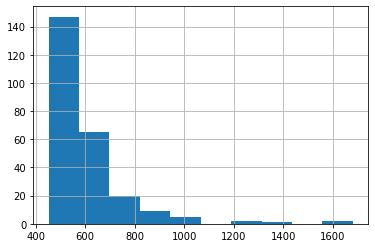

In [365]:
df_out['Манхэттенское'].hist()

In [366]:
len(df_out[df_out['Манхэттенское'] > 620])

69

<AxesSubplot:>

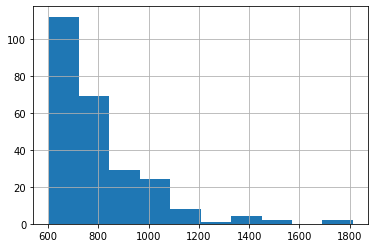

In [367]:
df_out['Евклидово'].hist()

In [368]:
len(df_out[df_out['Евклидово'] > 1000])

34

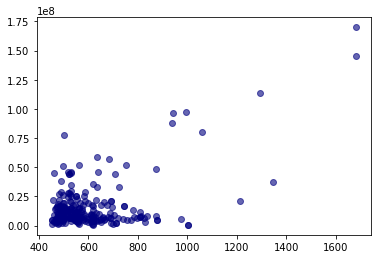

In [373]:
plt.scatter(x = df_out['Манхэттенское'], y = df['Цена'], c = 'navy', alpha=0.6)
plt.show()

In [391]:
df['Манхэттенское'] = df_out['Манхэттенское']
df

,Назначение_1,Назначение_2,Отдельный вход,Площадь,Этаж_1,Этаж_2,Этажность,Год постройки,ХВ,Цена,...,Широта,Долгота,Тип здания,Состояние отделки,Категория здания,Расстояние,metka,Манхэттенское,выбросы_метки,scores
0,Свободное назначение,Свободное назначение,есть,307.3,1,первый,4,1939,85,51662400,...,56.833654,60.614264,Жилой дом,с отделкой,Действующее,1063.931330,1,750.307672,1,5.462400e+06
1,Офис (А),Офис,нет,1131.2,2,второй,4,2009,15,87824400,...,56.833245,60.608218,Бизнес-центр,с отделкой,Действующее,735.488837,1,936.791586,1,2.617560e+07
2,Офис,Офис,нет,137.6,2,второй,20,2016,8,13800000,...,56.829320,60.611901,Жилой дом,с отделкой,Действующее,1170.423852,0,489.947468,0,3.000000e+05
3,Офис,Офис,нет,20.7,3,с 3 по 10,3,1994,30,1400000,...,56.844456,60.644097,Административное здание,с отделкой,Действующее,2987.447878,0,476.057117,0,4.000001e+05
4,Свободное назначение,Офис,нет,54.6,3,с 3 по 10,3,1994,30,3167000,...,56.844456,60.644097,Административное здание,с отделкой,NaN,2987.447878,0,473.228936,0,3.670000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Офис,Офис,нет,1520.0,6,с 3 по 10,13,2019,5,114000000,...,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558,1,1291.260908,1,3.400000e+07
247,Офис,Офис,нет,110.0,4,с 3 по 10,13,2019,5,8800000,...,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558,0,617.632382,0,1.320001e+05
248,Офис,Офис,нет,48.0,5,с 3 по 10,13,2019,5,4224000,...,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558,0,618.144074,0,1.660000e+05
249,Офис (B+),Офис,нет,193.8,2,второй,7,2006,18,16279201,...,56.840646,60.612180,Бизнес-центр,с отделкой,Действующее,1021.218095,0,471.791411,0,4.207990e+05


In [392]:
from pyod.models.knn import KNN

X = df[['Цена', 'Манхэттенское']]

clf_name = 'KNN'
clf = KNN(contamination = 0.20, n_neighbors = 5) #contamination - доля аномалий
clf.fit(X)

KNN(algorithm='auto', contamination=0.2, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [393]:
Y_train_pred = clf.labels_
Y_train_scores = clf.decision_scores_

In [394]:
df['выбросы_метки'] = Y_train_pred
df['scores'] = Y_train_scores
df

,Назначение_1,Назначение_2,Отдельный вход,Площадь,Этаж_1,Этаж_2,Этажность,Год постройки,ХВ,Цена,...,Широта,Долгота,Тип здания,Состояние отделки,Категория здания,Расстояние,metka,Манхэттенское,выбросы_метки,scores
0,Свободное назначение,Свободное назначение,есть,307.3,1,первый,4,1939,85,51662400,...,56.833654,60.614264,Жилой дом,с отделкой,Действующее,1063.931330,1,750.307672,1,5.462400e+06
1,Офис (А),Офис,нет,1131.2,2,второй,4,2009,15,87824400,...,56.833245,60.608218,Бизнес-центр,с отделкой,Действующее,735.488837,1,936.791586,1,2.617560e+07
2,Офис,Офис,нет,137.6,2,второй,20,2016,8,13800000,...,56.829320,60.611901,Жилой дом,с отделкой,Действующее,1170.423852,0,489.947468,0,3.000000e+05
3,Офис,Офис,нет,20.7,3,с 3 по 10,3,1994,30,1400000,...,56.844456,60.644097,Административное здание,с отделкой,Действующее,2987.447878,0,476.057117,0,4.000001e+05
4,Свободное назначение,Офис,нет,54.6,3,с 3 по 10,3,1994,30,3167000,...,56.844456,60.644097,Административное здание,с отделкой,NaN,2987.447878,0,473.228936,0,3.670000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Офис,Офис,нет,1520.0,6,с 3 по 10,13,2019,5,114000000,...,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558,1,1291.260908,1,3.400000e+07
247,Офис,Офис,нет,110.0,4,с 3 по 10,13,2019,5,8800000,...,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558,0,617.632382,0,1.320001e+05
248,Офис,Офис,нет,48.0,5,с 3 по 10,13,2019,5,4224000,...,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558,0,618.144074,0,1.660000e+05
249,Офис (B+),Офис,нет,193.8,2,второй,7,2006,18,16279201,...,56.840646,60.612180,Бизнес-центр,с отделкой,Действующее,1021.218095,0,471.791411,0,4.207990e+05


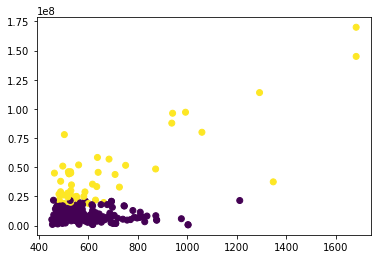

In [395]:
plt.scatter(x = df['Манхэттенское'], y = df['Цена'], c = df['выбросы_метки'], alpha=1)
plt.show()

In [396]:
df_i = df.loc[df['выбросы_метки'] == 0]
len(df_i)

202

In [397]:
df_i = df_i.loc[df_i['Манхэттенское'] < 700]
len(df_i)

176

In [355]:
metka = []
for i in range(0, 251, 1):
    if df_out['Манхэттенское'][i] > 620:
        met = 1
    else:
        met = 0
    metka.append(met)

In [356]:
pd.DataFrame(metka)[0].sum()

69

In [357]:
df['metka'] = metka
df

,Назначение_1,Назначение_2,Отдельный вход,Площадь,Этаж_1,Этаж_2,Этажность,Год постройки,ХВ,Цена,Цена (кв.м),Широта,Долгота,Тип здания,Состояние отделки,Категория здания,Расстояние,metka
0,Свободное назначение,Свободное назначение,есть,307.3,1,первый,4,1939,85,51662400,168117.149365,56.833654,60.614264,Жилой дом,с отделкой,Действующее,1063.931330,1
1,Офис (А),Офис,нет,1131.2,2,второй,4,2009,15,87824400,77638.260255,56.833245,60.608218,Бизнес-центр,с отделкой,Действующее,735.488837,1
2,Офис,Офис,нет,137.6,2,второй,20,2016,8,13800000,100290.697674,56.829320,60.611901,Жилой дом,с отделкой,Действующее,1170.423852,0
3,Офис,Офис,нет,20.7,3,с 3 по 10,3,1994,30,1400000,67632.850242,56.844456,60.644097,Административное здание,с отделкой,Действующее,2987.447878,0
4,Свободное назначение,Офис,нет,54.6,3,с 3 по 10,3,1994,30,3167000,58003.663004,56.844456,60.644097,Административное здание,с отделкой,NaN,2987.447878,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Офис,Офис,нет,1520.0,6,с 3 по 10,13,2019,5,114000000,75000.000000,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558,1
247,Офис,Офис,нет,110.0,4,с 3 по 10,13,2019,5,8800000,80000.000000,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558,0
248,Офис,Офис,нет,48.0,5,с 3 по 10,13,2019,5,4224000,88000.000000,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558,0
249,Офис (B+),Офис,нет,193.8,2,второй,7,2006,18,16279201,84000.005160,56.840646,60.612180,Бизнес-центр,с отделкой,Действующее,1021.218095,0


In [358]:
df_i = df.loc[df['metka'] == 0]
len(df_i)

182

In [398]:
X = df_i[['Площадь', 'Этаж_1', 'Год постройки', 'Широта', 'Долгота', 'Расстояние']] #'Площадь' LN(Площадь) 
#X = df_i[['Площадь', 'Этаж_1', 'ХВ', 'pca_kor', 'Расстояние']] #'Площадь' LN(Площадь)
#cat_features = [3]
#Y = df_2['LN(Цена)']
Y = df_i['Цена']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [402]:
from catboost import Pool, cv

cv_data = X

labels = Y

#cat_features = [4]

cv_dataset = Pool(data = cv_data,
                  label = labels,
                  #cat_features = cat_features
                  )

params = {"iterations": 1100,
          "max_depth": 3,
          "learning_rate": 0.013,
          #"l2_leaf_reg": 0.20,
          "random_seed": 5,
          "loss_function": "RMSE",
          "custom_loss": "MAPE",    #['AUC', 'Accuracy'],
          "verbose": False,
          "od_type": 'Iter', #если модель переобучилась
          "od_wait":  20,
          "verbose": 100
         }

scores = cv(cv_dataset,
            params,
            fold_count = 5,
            shuffle = True,
            partition_random_seed = 0,
            verbose = False,
            plot = "True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 2258097.379
bestIteration = 523

Training on fold [1/5]

bestTest = 4161384.059
bestIteration = 555

Training on fold [2/5]

bestTest = 2922875.507
bestIteration = 286

Training on fold [3/5]

bestTest = 3045786.113
bestIteration = 464

Training on fold [4/5]

bestTest = 3582112.863
bestIteration = 239



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 1189460.6178
MAPE на обучении: 0.1772
R2 на обучении: 0.9005
MAE на тесте: 1924905.1975
MAPE на тесте: 0.2704
R2 на обучении: 0.7215
MAE: 1339892.4636
MAPE: 0.1963
R2: 0.8703


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


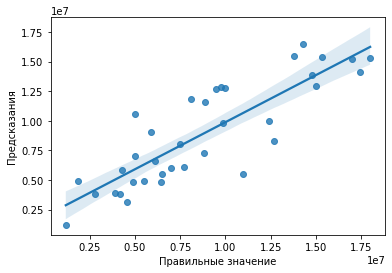

In [403]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
import seaborn as sns

catb = CatBoostRegressor(iterations = 1000, #максимальное количество построенных деревьев
                         random_seed = 5, 
                         learning_rate = 0.02, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 3, #глубина дерева
                         #l2_leaf_reg = 0.10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         #one_hot_max_size = 8, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 20) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = list(range(0, X.shape[1]))
#cat_features = list(df['transmission'])
#print(cat_features) 

catb.fit(X_train, Y_train, 
         #cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         plot = True) #включение графика

Ypred = catb.predict(X_test)

pred_1 = catb.predict(X)

pred_train = catb.predict(X_train)
mse_train = mse(Y_train, pred_train)

print("MAE на обучении:", round(mae(Y_train, pred_train), 4))
print("MAPE на обучении:", round(mape(Y_train, pred_train), 4))
print("R2 на обучении:", round(r2_score(Y_train, pred_train), 4))

pred_test = catb.predict(X_test)
mse_test = mse(Y_test, pred_test)

print("MAE на тесте:", round(mae(Y_test, pred_test), 4))
print("MAPE на тесте:", round(mape(Y_test, pred_test), 4))
print("R2 на обучении:", round(r2_score(Y_test, pred_test), 4))
print("===============================")
print("MAE:", round(mae(Y, pred_1), 4))
print("MAPE:", round(mape(Y, pred_1), 4))
print("R2:", round(r2_score(Y, pred_1), 4))

sns.regplot(Y_test, pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [441]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Выборки_cian/Офисы_Ектб.xlsx', sheet_name = 0)
df

,Назначение_1,Назначение_2,Отдельный вход,Площадь,LN(Площадь),Этаж_1,Этаж_2,Этажность,Год постройки,ХВ,...,LN(Цена),Цена (кв.м),Широта,Долгота,pca_kor,Комментарий,Тип здания,Состояние отделки,Расстояние,выбросы_метки
0,Офис,Офис,нет,137.6,4.924351,2,второй,20,2016,8,...,16.440179,100290.697674,56.829320,60.611901,0.003272,NaN,Жилой дом,с отделкой,1170.423852,0
1,Офис,Офис,нет,20.7,3.030134,3,с 3 по 10,3,1994,30,...,14.151983,67632.850242,56.844456,60.644097,-0.031873,NaN,Административное здание,с отделкой,2987.447878,0
2,Свободное назначение,Офис,нет,54.6,4.000034,3,с 3 по 10,3,1994,30,...,14.968295,58003.663004,56.844456,60.644097,-0.031873,NaN,Административное здание,с отделкой,2987.447878,0
3,Офис,Свободное назначение,есть,31.8,3.459466,1,первый,1,1964,60,...,14.457364,59748.427673,56.899257,60.598939,-0.025219,NaN,Торговое,с отделкой,7016.411819,0
4,Свободное назначение,Свободное назначение,есть,19.7,2.980619,0,цоколь/подвал,10,2000,24,...,13.289571,30000.000000,56.747956,60.616079,0.045443,NaN,Жилой дом,с отделкой,9897.915465,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Офис (А),Свободное назначение,есть,119.0,4.779123,1,первый,9,2007,17,...,16.292049,100000.000000,56.834092,60.653359,-0.033729,NaN,Жилой дом,с отделкой,3418.643280,0
184,Офис,Офис,нет,110.0,4.700480,4,с 3 по 10,13,2019,5,...,15.990262,80000.000000,56.885830,60.635105,-0.047632,NaN,Бизнес-центр,с отделкой,5978.427558,0
185,Офис,Офис,нет,48.0,3.871201,5,с 3 по 10,13,2019,5,...,15.256293,88000.000000,56.885830,60.635105,-0.047632,NaN,Бизнес-центр,с отделкой,5978.427558,0
186,Офис (B+),Офис,нет,193.8,5.266827,2,второй,7,2006,18,...,16.605399,84000.005160,56.840646,60.612180,-0.003311,NaN,Бизнес-центр,с отделкой,1021.218095,0


In [442]:
X = df[['Площадь', 'Этаж_1', 'Год постройки', 'Широта', 'Долгота', 'Расстояние']] #'Площадь' LN(Площадь) 
#X = df_i[['Площадь', 'Этаж_1', 'ХВ', 'pca_kor', 'Расстояние']] #'Площадь' LN(Площадь)
#cat_features = [3]
#Y = df_2['LN(Цена)']
Y = df['Цена']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [443]:
from catboost import Pool, cv

cv_data = X

labels = Y

#cat_features = [4]

cv_dataset = Pool(data = cv_data,
                  label = labels,
                  #cat_features = cat_features
                  )

params = {"iterations": 1100,
          "max_depth": 6,
          "learning_rate": 0.013,
          #"l2_leaf_reg": 0.20,
          "random_seed": 5,
          "loss_function": "MAE",
          "custom_loss": "MAPE",    #['AUC', 'Accuracy'],
          "verbose": False,
          "od_type": 'Iter', #если модель переобучилась
          "od_wait":  20,
          "verbose": 100
         }

scores = cv(cv_dataset,
            params,
            fold_count = 5,
            shuffle = True,
            partition_random_seed = 0,
            verbose = False,
            plot = "True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 1291705.907
bestIteration = 626

Training on fold [1/5]

bestTest = 1917631.741
bestIteration = 385

Training on fold [2/5]

bestTest = 1910846.356
bestIteration = 895

Training on fold [3/5]

bestTest = 2256136.82
bestIteration = 959

Training on fold [4/5]

bestTest = 1608106.005
bestIteration = 455



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 858677.465
MAPE на обучении: 0.1206
R2 на обучении: 0.9608
MAE на тесте: 1116969.1103
MAPE на тесте: 0.1408
R2 на обучении: 0.924
MAE: 910885.3508
MAPE: 0.1247
R2: 0.9529


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


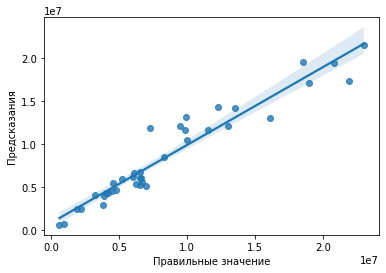

In [444]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
import seaborn as sns

catb = CatBoostRegressor(iterations = 1000, #максимальное количество построенных деревьев
                         random_seed = 5, 
                         learning_rate = 0.03, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 3, #глубина дерева
                         #l2_leaf_reg = 0.10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         #one_hot_max_size = 8, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 20) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = list(range(0, X.shape[1]))
#cat_features = list(df['transmission'])
#print(cat_features) 

catb.fit(X_train, Y_train, 
         #cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         plot = True) #включение графика

Ypred = catb.predict(X_test)

pred_1 = catb.predict(X)

pred_train = catb.predict(X_train)
mse_train = mse(Y_train, pred_train)

print("MAE на обучении:", round(mae(Y_train, pred_train), 4))
print("MAPE на обучении:", round(mape(Y_train, pred_train), 4))
print("R2 на обучении:", round(r2_score(Y_train, pred_train), 4))

pred_test = catb.predict(X_test)
mse_test = mse(Y_test, pred_test)

print("MAE на тесте:", round(mae(Y_test, pred_test), 4))
print("MAPE на тесте:", round(mape(Y_test, pred_test), 4))
print("R2 на обучении:", round(r2_score(Y_test, pred_test), 4))
print("===============================")
print("MAE:", round(mae(Y, pred_1), 4))
print("MAPE:", round(mape(Y, pred_1), 4))
print("R2:", round(r2_score(Y, pred_1), 4))

sns.regplot(Y_test, pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

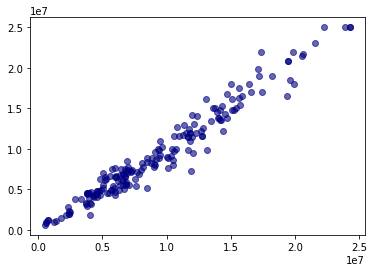

In [445]:
plt.scatter(x = pred_1, y = Y, c = 'navy', alpha=0.6)
plt.show()

# Метод Z-оценки

In [495]:
#случайные данные
data = [1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, 1, 1, 2]
#вычисление среднего значения
mean = np.mean(data)
#вычисление стандартного отклонения
std = np.std(data)
#вывод значений
print(f'the mean is: {mean: .2f}')
print(f'the standard deviation ins:{std: .2f}')

the mean is:  2.67
the standard deviation ins: 3.36


In [496]:
#порог
threshold = 3
#список выбросов
outlier = []
#обнаружение выбросов
for i in data:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
        
print(f'the outliers are: {outlier}')

the outliers are: [15]


# Изолирующий лес

In [518]:
from sklearn.ensemble import IsolationForest #импортирование алгоритма “изолирующий лес”

#определение признака и метки
X = df[['Площадь', 'Этаж_1', 'Год постройки', 'Широта', 'Долгота', 'Расстояние']]
Y = df['Цена']

#идентифицирование выбросов
iso = IsolationForest(n_estimators = 100, contamination = 0.1)
y_outliers = iso.fit_predict(X)

C:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [503]:
y_outliers

array([ 1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [519]:
y_outliers[y_outliers==1] = 0
y_outliers[y_outliers==-1] = 1
y_outliers

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0])

In [506]:
scores_pred = iso.decision_function(X)
scores_pred

array([ 0.04360363,  0.01651171,  0.13224558,  0.11224804,  0.11889781,
       -0.0298573 ,  0.0288258 , -0.07713332,  0.02692411,  0.02759039,
        0.10497459,  0.02796061, -0.02772905,  0.10783988,  0.10719106,
       -0.03437336,  0.08467063,  0.03437317,  0.10244774,  0.11590923,
        0.09902766,  0.09151047,  0.02276981,  0.13108172, -0.03368859,
       -0.07416977,  0.02422392,  0.08061173,  0.10511823,  0.09433887,
        0.11983356,  0.11226039,  0.10719106,  0.1409862 ,  0.07030106,
        0.11383129,  0.04370087, -0.02615675,  0.13618576,  0.10870981,
        0.03286053,  0.14035237,  0.11640456,  0.09167938,  0.12883566,
        0.12312289,  0.08938132,  0.10673943,  0.02391683,  0.08364452,
        0.04884267,  0.05911394,  0.12749468,  0.11405221,  0.01765026,
       -0.03366677,  0.07341569,  0.06291525,  0.08224004, -0.00200329,
        0.06756031,  0.03654408,  0.13404497,  0.01736841,  0.0718042 ,
        0.09207803,  0.12374318,  0.10665962,  0.10344694,  0.12

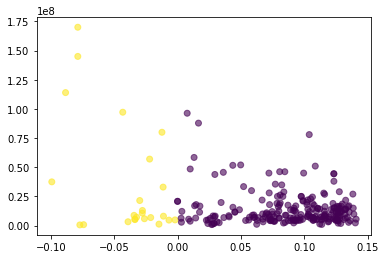

In [508]:
plt.scatter(x = scores_pred, y = Y, c = y_outliers, alpha=0.6)
plt.show()

In [522]:
df['метка'] = y_outliers
df

,Назначение_1,Назначение_2,Отдельный вход,Площадь,Этаж_1,Этаж_2,Этажность,Год постройки,ХВ,Цена,...,Широта,Долгота,Тип здания,Состояние отделки,Категория здания,Расстояние,Манхэттенское,выбросы_метки,scores,метка
0,Свободное назначение,Свободное назначение,есть,307.3,1,первый,4,1939,85,51662400,...,56.833654,60.614264,Жилой дом,с отделкой,Действующее,1063.931330,749.670723,1,5.462400e+06,0
1,Офис (А),Офис,нет,1131.2,2,второй,4,2009,15,87824400,...,56.833245,60.608218,Бизнес-центр,с отделкой,Действующее,735.488837,935.602148,1,2.617560e+07,0
2,Офис,Офис,нет,137.6,2,второй,20,2016,8,13800000,...,56.829320,60.611901,Жилой дом,с отделкой,Действующее,1170.423852,461.546904,0,3.000000e+05,0
3,Офис,Офис,нет,20.7,3,с 3 по 10,3,1994,30,1400000,...,56.844456,60.644097,Административное здание,с отделкой,Действующее,2987.447878,375.014386,0,4.000000e+05,0
4,Свободное назначение,Офис,нет,54.6,3,с 3 по 10,3,1994,30,3167000,...,56.844456,60.644097,Административное здание,с отделкой,NaN,2987.447878,370.264247,0,3.670000e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Офис,Офис,нет,1520.0,6,с 3 по 10,13,2019,5,114000000,...,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558,1291.250764,1,3.400000e+07,1
247,Офис,Офис,нет,110.0,4,с 3 по 10,13,2019,5,8800000,...,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558,500.449257,0,1.320000e+05,0
248,Офис,Офис,нет,48.0,5,с 3 по 10,13,2019,5,4224000,...,56.885830,60.635105,Бизнес-центр,с отделкой,NaN,5978.427558,506.019174,0,1.660000e+05,0
249,Офис (B+),Офис,нет,193.8,2,второй,7,2006,18,16279201,...,56.840646,60.612180,Бизнес-центр,с отделкой,Действующее,1021.218095,448.771836,0,4.207990e+05,0


In [528]:
df_i = df.loc[df['метка'] == 0]
df_i = df_i.loc[df_i['Цена'] < 40000000]
len(df_i)

211

In [529]:
X = df_i[['Площадь', 'Этаж_1', 'Год постройки', 'Широта', 'Долгота', 'Расстояние']] #'Площадь' LN(Площадь) 
#X = df_i[['Площадь', 'Этаж_1', 'ХВ', 'pca_kor', 'Расстояние']] #'Площадь' LN(Площадь)
#cat_features = [3]
#Y = df_2['LN(Цена)']
Y = df_i['Цена']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [530]:
from catboost import Pool, cv

cv_data = X

labels = Y

#cat_features = [4]

cv_dataset = Pool(data = cv_data,
                  label = labels,
                  #cat_features = cat_features
                  )

params = {"iterations": 1100,
          "max_depth": 6,
          "learning_rate": 0.013,
          #"l2_leaf_reg": 0.20,
          "random_seed": 5,
          "loss_function": "MAE",
          "custom_loss": "MAPE",    #['AUC', 'Accuracy'],
          "verbose": False,
          "od_type": 'Iter', #если модель переобучилась
          "od_wait":  20,
          "verbose": 100
         }

scores = cv(cv_dataset,
            params,
            fold_count = 5,
            shuffle = True,
            partition_random_seed = 0,
            verbose = False,
            plot = "True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 3237564.847
bestIteration = 615

Training on fold [1/5]

bestTest = 3319715.74
bestIteration = 550

Training on fold [2/5]

bestTest = 1905010.678
bestIteration = 669

Training on fold [3/5]

bestTest = 2304963.842
bestIteration = 708

Training on fold [4/5]

bestTest = 2344601.389
bestIteration = 492



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 2431384.8939
MAPE на обучении: 0.3029
R2 на обучении: 0.7992
MAE на тесте: 1908442.1832
MAPE на тесте: 0.2367
R2 на обучении: 0.7638
MAE: 2324813.6306
MAPE: 0.2894
R2: 0.7966


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


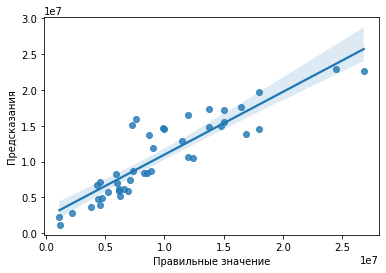

In [539]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
import seaborn as sns

catb = CatBoostRegressor(iterations = 1000, #максимальное количество построенных деревьев
                         random_seed = 5, 
                         learning_rate = 0.01, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 2, #глубина дерева
                         #l2_leaf_reg = 0.10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         #one_hot_max_size = 8, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 20) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = list(range(0, X.shape[1]))
#cat_features = list(df['transmission'])
#print(cat_features) 

catb.fit(X_train, Y_train, 
         #cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         plot = True) #включение графика

Ypred = catb.predict(X_test)

pred_1 = catb.predict(X)

pred_train = catb.predict(X_train)
mse_train = mse(Y_train, pred_train)

print("MAE на обучении:", round(mae(Y_train, pred_train), 4))
print("MAPE на обучении:", round(mape(Y_train, pred_train), 4))
print("R2 на обучении:", round(r2_score(Y_train, pred_train), 4))

pred_test = catb.predict(X_test)
mse_test = mse(Y_test, pred_test)

print("MAE на тесте:", round(mae(Y_test, pred_test), 4))
print("MAPE на тесте:", round(mape(Y_test, pred_test), 4))
print("R2 на обучении:", round(r2_score(Y_test, pred_test), 4))
print("===============================")
print("MAE:", round(mae(Y, pred_1), 4))
print("MAPE:", round(mape(Y, pred_1), 4))
print("R2:", round(r2_score(Y, pred_1), 4))

sns.regplot(Y_test, pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

# DBSCAN

In [550]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [575]:
X_all = df[['Цена', 'Площадь', 'Этаж_1', 'Год постройки', 'Широта', 'Долгота', 'Расстояние']]

In [578]:
#Теперь давайте промасштабируем и нормализуем набор данных
from sklearn.preprocessing import normalize

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_all)
x_normal = normalize(x_scaled)
x_normal = pd.DataFrame(x_normal, columns = X_all.columns)
x_normal

,Цена,Площадь,Этаж_1,Год постройки,Широта,Долгота,Расстояние
0,0.480962,0.125488,-0.179521,-0.788934,-0.049610,0.045526,-0.306185
1,0.662823,0.699664,-0.067309,0.081463,-0.036705,-0.008860,-0.241958
2,-0.079083,-0.152674,-0.252640,0.538742,-0.238505,0.058149,-0.745722
3,-0.448158,-0.422217,-0.039377,-0.170308,0.132017,0.754601,-0.059004
4,-0.417623,-0.358867,-0.041715,-0.180420,0.139855,0.799405,-0.062507
...,...,...,...,...,...,...,...
246,0.630144,0.689150,0.107450,0.118508,0.224890,0.117660,0.194889
247,-0.134483,-0.122442,0.086921,0.340157,0.645508,0.337723,0.559395
248,-0.209527,-0.205506,0.189112,0.325431,0.617564,0.323103,0.535178
249,0.007926,0.005180,-0.290644,0.236900,0.060028,0.074862,-0.922013


In [553]:
#Теперь я реализую алгоритм анализа главных компонентов (PCA) в машинном обучении, чтобы 
#уменьшить размерность данных для визуализации
pca = PCA(n_components = 2)
x_principal = pca.fit_transform(x_normal)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['V1', 'V2']
print(x_principal.head())

         V1        V2
0 -0.127602  0.806476
1 -0.310134  0.202642
2 -0.407716 -0.411327
3  0.720911 -0.063314
4  0.744882 -0.046090


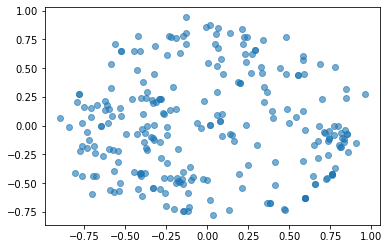

In [556]:
plt.scatter(x = x_principal['V1'], y = x_principal['V2'], alpha=0.6)
plt.show()

In [571]:
#А сейчас давайте реализуем алгоритм DBSCAN и посмотрим на данные и кластеры после его реализации
dbscan = DBSCAN(eps = 0.025, min_samples = 4).fit(x_principal)
labels = dbscan.labels_
X_all['cluster'] = dbscan.labels_
print(X_all.tail())

          Цена  Площадь  Этаж_1  Год постройки     Широта    Долгота  \
246  114000000   1520.0       6           2019  56.885830  60.635105   
247    8800000    110.0       4           2019  56.885830  60.635105   
248    4224000     48.0       5           2019  56.885830  60.635105   
249   16279201    193.8       2           2006  56.840646  60.612180   
250    4000000     50.0       6           2019  56.885830  60.635105   

      Расстояние  cluster  
246  5978.427558       -1  
247  5978.427558       -1  
248  5978.427558        2  
249  1021.218095       -1  
250  5978.427558       -1  


C:\Users\skapr\AppData\Local\Temp\ipykernel_7572\3470302470.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all['cluster'] = dbscan.labels_


In [572]:
X_all['cluster'].value_counts(sort = True, ascending = False)

-1    239
 0      4
 1      4
 2      4
Name: cluster, dtype: int64

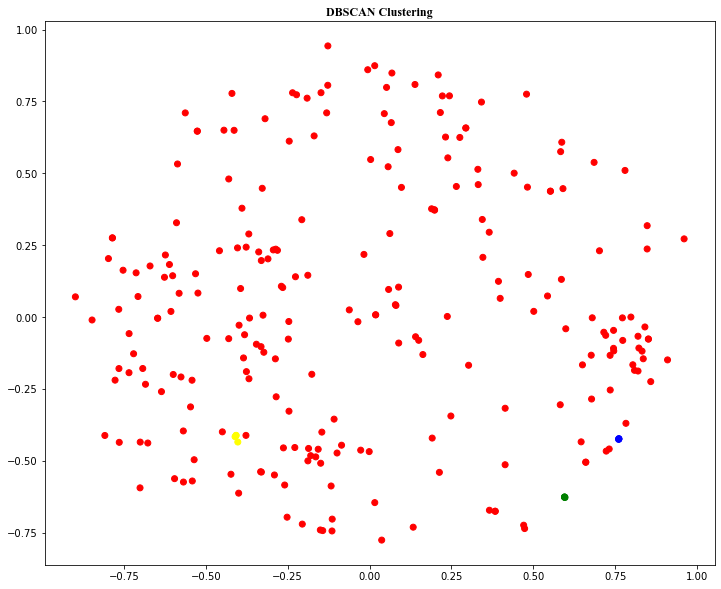

In [573]:
clusterColor = {0: u'yellow', 1: u'green', 2: 'blue', -1: u'red'}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize = (12, 10))
plt.scatter(x_principal['V1'], x_principal['V2'], c=colors)
plt.title("DBSCAN Clustering", fontname = "Times New Roman", fontweight = "bold")
plt.show()

In [599]:
#Теперь давайте промасштабируем и нормализуем набор данных
from sklearn.preprocessing import normalize

X_all = df[['Площадь', 'Этаж_1', 'Год постройки', 'Широта', 'Долгота', 'Расстояние']]
Y_all = df['Цена']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_all)
x_scaled = pd.DataFrame(x_scaled, columns = X_all.columns)
x_scaled

,Площадь,Этаж_1,Год постройки,Широта,Долгота,Расстояние
0,0.441427,-0.631499,-2.775224,-0.174514,0.160145,-1.077063
1,3.600946,-0.346416,0.419265,-0.188907,-0.045598,-1.245280
2,-0.209344,-0.346416,0.738714,-0.327034,0.079733,-1.022521
3,-0.657636,-0.061333,-0.265268,0.205627,1.175350,-0.091903
4,-0.527635,-0.061333,-0.265268,0.205627,1.175350,-0.091903
...,...,...,...,...,...,...
246,5.091929,0.793916,0.875621,1.661647,0.869356,1.439976
247,-0.315185,0.223750,0.875621,1.661647,0.869356,1.439976
248,-0.552945,0.508833,0.875621,1.661647,0.869356,1.439976
249,0.006174,-0.346416,0.282359,0.071546,0.089227,-1.098939


In [601]:
pca = PCA(n_components = 1)
x_principal = pca.fit_transform(x_scaled)
x_principal = pd.DataFrame(x_principal)
x_principal

,0
0,-0.370252
1,2.059209
2,0.591563
3,-0.712138
4,-0.664354
...,...
246,1.192954
247,-1.097318
248,-1.033319
249,0.533233


In [613]:
#А сейчас давайте реализуем алгоритм DBSCAN и посмотрим на данные и кластеры после его реализации
dbscan = DBSCAN(eps = 0.03, min_samples = 3).fit(x_principal)
labels = dbscan.labels_
X_all['cluster'] = dbscan.labels_
#print(X_all.tail())
X_all['cluster'].value_counts(sort = True, ascending = False)

C:\Users\skapr\AppData\Local\Temp\ipykernel_7572\2041783865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all['cluster'] = dbscan.labels_


 9     60
 3     33
-1     33
 10    14
 13    14
 0     12
 5      9
 15     8
 19     8
 11     7
 12     7
 2      7
 6      5
 4      5
 14     5
 16     5
 18     5
 8      4
 1      4
 7      3
 17     3
Name: cluster, dtype: int64

In [620]:
for i in range(0, 251, 1):
    if X_all['cluster'][i] == -1:
        X_all['cluster'][i] = 1
    else:
        X_all['cluster'][i] = 0
X_all

C:\Users\skapr\AppData\Local\Temp\ipykernel_7572\1269514444.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all['cluster'][i] = 0
C:\Users\skapr\AppData\Local\Temp\ipykernel_7572\1269514444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all['cluster'][i] = 1


,Площадь,Этаж_1,Год постройки,Широта,Долгота,Расстояние,cluster
0,307.3,1,1939,56.833654,60.614264,1063.931330,0
1,1131.2,2,2009,56.833245,60.608218,735.488837,0
2,137.6,2,2016,56.829320,60.611901,1170.423852,0
3,20.7,3,1994,56.844456,60.644097,2987.447878,0
4,54.6,3,1994,56.844456,60.644097,2987.447878,0
...,...,...,...,...,...,...,...
246,1520.0,6,2019,56.885830,60.635105,5978.427558,0
247,110.0,4,2019,56.885830,60.635105,5978.427558,0
248,48.0,5,2019,56.885830,60.635105,5978.427558,0
249,193.8,2,2006,56.840646,60.612180,1021.218095,0


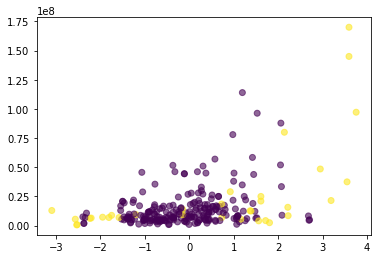

In [621]:
plt.scatter(x = x_principal, y = Y_all, c = X_all['cluster'], alpha=0.6)
plt.show()

In [623]:
X_all[X_all['cluster'] == 1]

,Площадь,Этаж_1,Год постройки,Широта,Долгота,Расстояние,cluster
5,108.70,20,2011,56.836106,60.614650,1047.436245,1
7,19.70,0,2000,56.747956,60.616079,9897.915465,1
12,107.96,1,1951,56.898554,60.643810,7490.639120,1
15,160.60,0,1958,56.780941,60.605074,6176.846260,1
20,160.70,10,2011,56.826754,60.616186,1556.110372,1
25,26.80,0,2000,56.747956,60.616079,9897.915465,1
36,64.90,12,2016,56.845081,60.589659,1093.037005,1
40,103.00,12,2008,56.813118,60.591034,2606.349266,1
46,33.00,8,2014,56.831960,60.587611,769.704117,1
61,43.10,1,1949,56.802652,60.626553,4141.312734,1


In [625]:
X_all = df[['Цена', 'Площадь']]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_all)
x_scaled = pd.DataFrame(x_scaled, columns = X_all.columns)
x_scaled

,Цена,Площадь
0,1.691874,0.441427
1,3.411333,3.600946
2,-0.108437,-0.209344
3,-0.698041,-0.657636
4,-0.614023,-0.527635
...,...,...
246,4.655951,5.091929
247,-0.346181,-0.315185
248,-0.563764,-0.552945
249,0.009446,0.006174


In [644]:
#А сейчас давайте реализуем алгоритм DBSCAN и посмотрим на данные и кластеры после его реализации
dbscan = DBSCAN(eps = 0.2, min_samples = 5).fit(x_scaled)
labels = dbscan.labels_
X_all['cluster'] = dbscan.labels_
#print(X_all.tail())
X_all['cluster'].value_counts(sort = True, ascending = False)

C:\Users\skapr\AppData\Local\Temp\ipykernel_7572\2019264297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all['cluster'] = dbscan.labels_


 0    211
-1     40
Name: cluster, dtype: int64

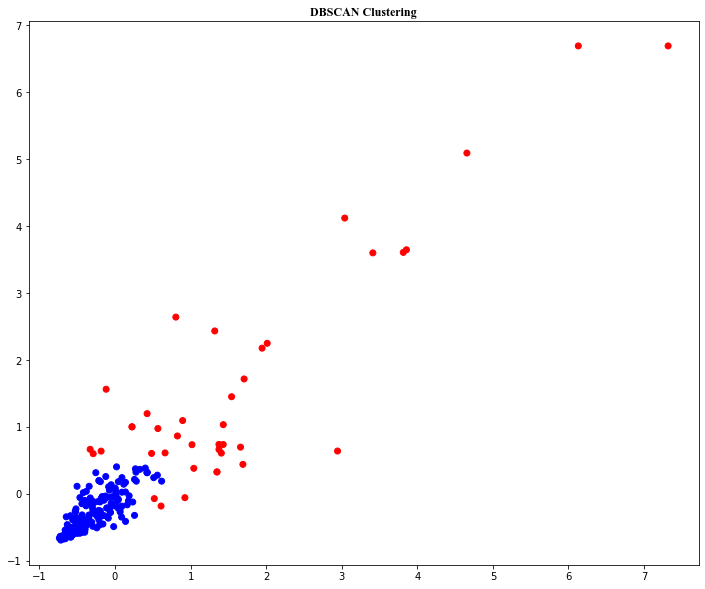

In [645]:
clusterColor = {0: u'blue', 1: u'red', 2: u'red', -1: u'red'}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize = (12, 10))
plt.scatter(x_scaled['Цена'], x_scaled['Площадь'], c = colors)
plt.title("DBSCAN Clustering", fontname = "Times New Roman", fontweight = "bold")
plt.show()

In [542]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

In [547]:
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = IsolationForest(contamination=outliers_fraction,random_state=0)
clf.fit(X)
scores_pred = clf.decision_function(X) * -1

y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
plt.figure(figsize=(8, 8))

df1 = df
df1['outlier'] = y_pred.tolist()
    
# sales - inlier feature 1,  profit - inlier feature 2
inliers_sales = np.array(df1['Sales'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['Profit'][df1['outlier'] == 0]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = df1['Sales'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['Profit'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS: ',n_outliers,'INLIERS: ',n_inliers)

threshold = percentile(scores_pred, 100 * outliers_fraction)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
plt.axis('tight')
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Isolation Forest')
plt.show();

C:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


ValueError: Length of values (211) does not match length of index (251)

<Figure size 576x576 with 0 Axes>

In [546]:
xx

array([[0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       ...,
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ]])